1)Choose a dataset of your interest 
(e.g., weather data, movie ratings, or sports statistics) and use Python libraries like Pandas 
and Matplotlib/Seaborn to explore and visualize the data. Create various types of plots, such as 
line plots, bar plots, and scatter plots, to gain insights into the dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv(r"C:\Users\Sneha Vijay\Downloads\virtual intern\weatherHistory.csv")

In [4]:
#printing 5 observations
data.head(5)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [4]:
#data types of data set
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [5]:
data.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [6]:
#only one column containing null values
#so we can remove using median imputation
data["Precip Type"].fillna(data["Precip Type"].mode()[0], inplace=True)


In [7]:
data.isnull().sum()

Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
Daily Summary               0
dtype: int64

# using visualization to interpret the data

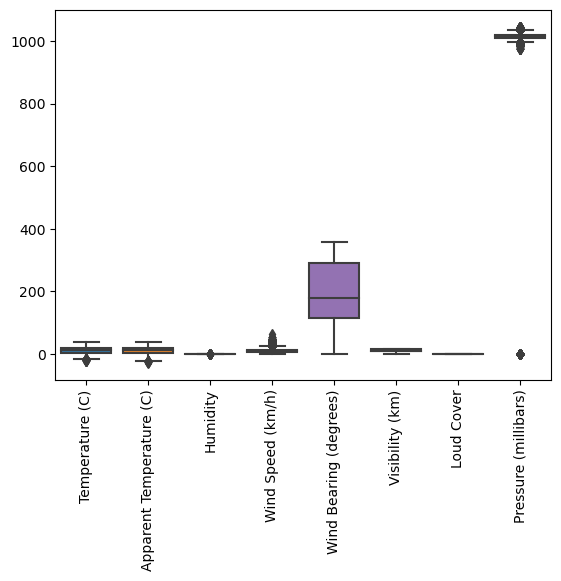

In [8]:
#creating box plot for identifiying outliers
sns.boxplot(data)
plt.xticks(rotation=90)
plt.show()

In [9]:
# in this outliers are not present
#wind bearing have high mean value


#manually checking for outliers 
#giving 1.5 as value
q1=data.quantile(0.25)
q3=data.quantile(0.75)
iqr=q3-q1
ul=q3+1.5*iqr
ll=q1-1.5*iqr
data[~((data<ll)|(data>ul)).any(axis=1)]
#there are so many outliers present with in this range

In [10]:
#spliting categorical and numerical values
data_num=data.select_dtypes(include=np.number)
data_cat=data.select_dtypes(include="object")

In [11]:
#univariate analysis

In [12]:
data_num.columns

Index(['Temperature (C)', 'Apparent Temperature (C)', 'Humidity',
       'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)',
       'Loud Cover', 'Pressure (millibars)'],
      dtype='object')

In [13]:
data_cat.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Daily Summary'], dtype='object')

In [14]:
#creating plot for temperature and formatted date
#sns.barplot(data=data,x="Formatted Date",y='Temperature (C)')
#plt.show()

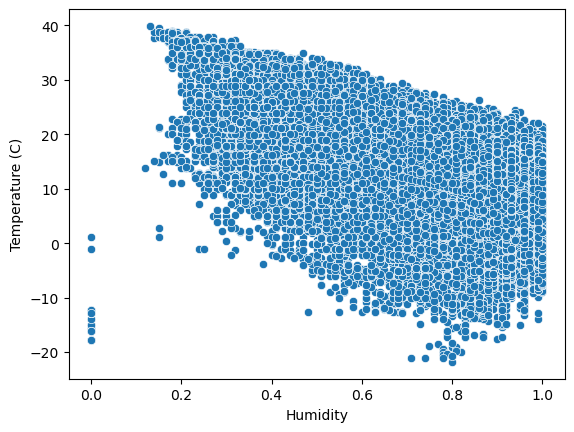

In [15]:
sns.scatterplot(y=data["Temperature (C)"],x=data["Humidity"])
plt.show()

In [16]:
#in this it make a pattern between humidity and temperature
#most of the data points are overlapped


In [17]:
#sns.pairplot(data,kind="kde")

In [18]:
data.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

In [19]:
df=pd.DataFrame(data=data,columns=['Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)'])
df1=data['Temperature (C)']
df_plot = pd.concat([df, df1], axis=1)


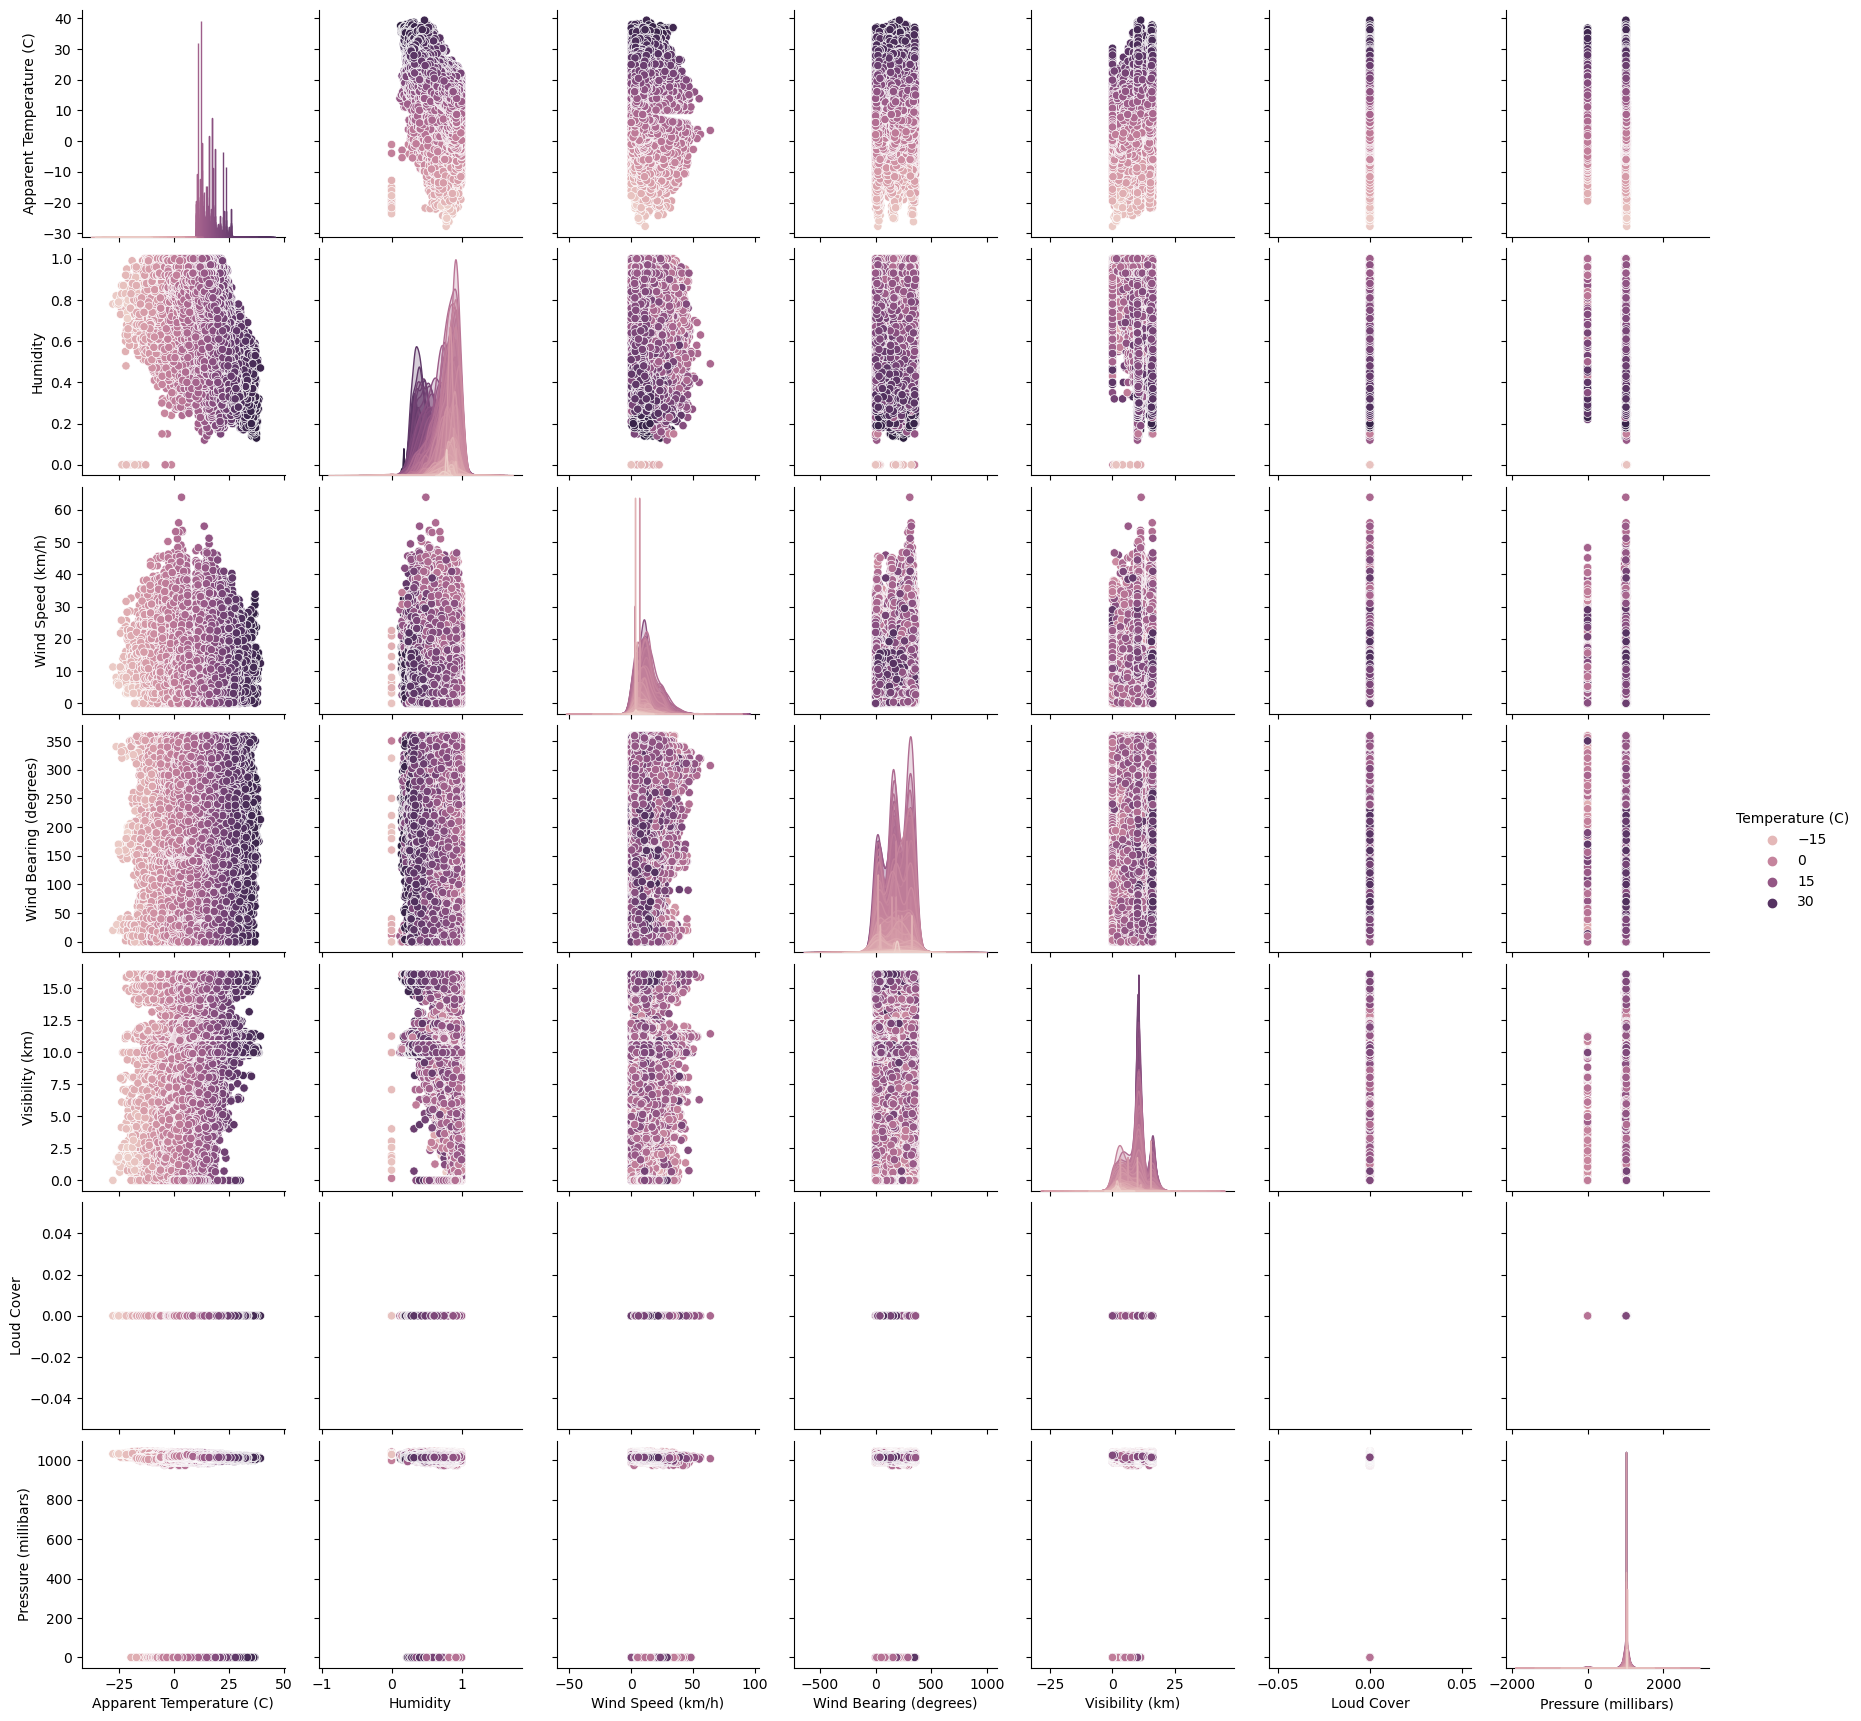

In [20]:
sns.pairplot(df_plot,hue='Temperature (C)')


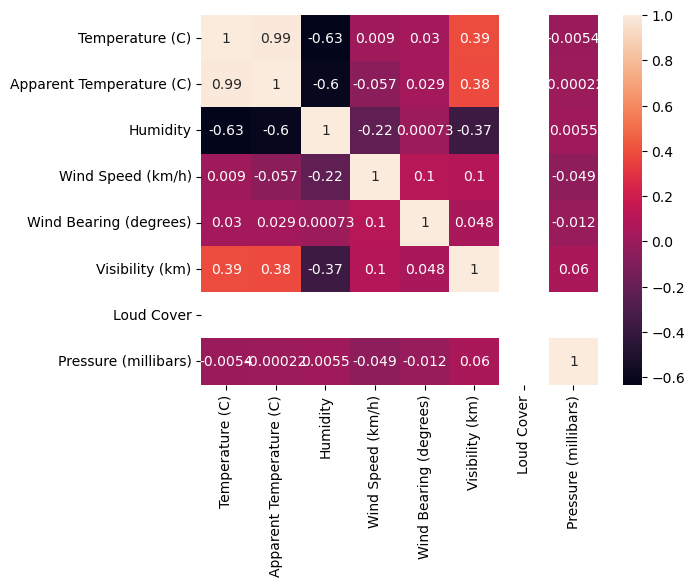

In [22]:
#correlation map
sns.heatmap(data.corr(),annot=True)
plt.show()

In [ ]:
#from the above graph we may assume that higher correlation between
#humidity and temperature
